In [1]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

Uploading the data

In [3]:
# import dask.dataframe as dd
# df1 = pd.read_csv(r"C:\Users\assaf\Desktop\credit_card_fraud.csv")
# df2 = pd.read_csv(r"C:\Users\assaf\Desktop\customers.csv", sep='|')

In [2]:
df1 = pd.read_csv(r"Desktop\credit_card_fraud.csv")
df2 = pd.read_csv(r"Desktop\customers.csv", sep='|')

Break down the column of 'trans_date' into separate components (year, month, day, and quarter) as new columns in the DataFrame for later use

In [4]:
# Convert the 'trans_date' to datetime
df1['trans_date'] = pd.to_datetime(df1['trans_date'])

# Extract the year from the date column
df1['year'] = df1['trans_date'].dt.year
# Extract the month from the date column
df1['month'] = df1['trans_date'].dt.month
# Extract the year from the date column
df1['day'] = df1['trans_date'].dt.day
# Extract the quarter from the date column
df1['quarter'] = df1['trans_date'].dt.quarter

In [5]:
# Add 'is_weekend' column (True for Saturday & Sunday, False otherwise)
df1['is_weekend'] = df1['day'] >= 5  # 5 (Saturday), 6 (Sunday)

In [6]:
df1['year'].unique()

array([2020, 2019])

In [7]:
df1['month'].unique()

array([ 2, 12, 10,  6,  1,  3,  5,  4,  9,  7,  8, 11])

In [8]:
df1['day'].unique()

array([15, 16, 26, 27,  3,  4, 14, 19, 18, 24, 30,  8, 11, 17, 13, 12, 23,
       21,  1, 22, 20,  5,  2, 25, 28, 29,  6, 10,  7, 31,  9])

In [9]:
df1['is_weekend'].unique()

array([ True, False])

In [10]:
df1['quarter'].unique()

array([1, 4, 2, 3])

## Reducing the df by year and quarter

The df is too big therefore reducing the df by year anf month reduce the df significlly

In [11]:
# Filter rows where year is 2019
df1 = df1[df1['year'] == 2019]

# Filter rows where quarter is 4
df1 = df1[df1['quarter'] == 4]

# Filter rows where month is 11
df1 = df1[df1['month'] == 11]

After reducing the df by year and month we dont need the columns anymore, they have only one value each

In [102]:
df1 = df1.drop(['year', 'month', 'quarter'], axis=1)

In [12]:
df1['year'].value_counts()

year
2019    1364656
Name: count, dtype: int64

In [103]:
df1.head()

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,day,is_weekend
356,356,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,21:11:18,1574437278,shopping_net,79.45,0,"fraud_Stanton, Jakubowski and Baumbach",32.283283,-97.201143,22,True
363,363,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,13:24:59,1573890899,shopping_net,58.73,0,"fraud_Reichert, Rowe and Mraz",33.609259,-95.649545,16,True
399,399,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,18:02:16,1573216336,shopping_net,8.93,0,fraud_Kassulke PLC,33.125897,-96.992439,8,True
404,404,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,22:25:16,1575046516,shopping_net,1.49,0,"fraud_Reichert, Rowe and Mraz",33.827816,-96.317710,29,True
420,420,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,18:41:38,1574860298,shopping_net,99.41,0,fraud_Ankunding LLC,32.300162,-96.499424,27,True


In [14]:
df1.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'month', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [15]:
df2.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')

Checking common column names in the two df's for later merge

In [16]:
# Get the common column names
common_columns = df1.columns.intersection(df2.columns)

# Display the common columns
print("Common columns:", common_columns)

Common columns: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')


### Merging tables 
Inner Join                                                                                                                        
This type of merge returns only the rows where there is a match between the two dataframes.<br>                                      
Outer Join      <br>                                                                                                              This type of merge returns all rows from both dataframes, and fills in NaN where there are no matches.

In [17]:
# Merge the dataframes on common columns without duplicating columns
merged_df= pd.merge(df1, df2, on=['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'], how='inner')

# Display the first few rows of the merged dataframe
merged_df

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,amt,is_fraud,merchant,merch_lat,merch_long,year,month,day,quarter,is_weekend
0,356,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,79.45,0,"fraud_Stanton, Jakubowski and Baumbach",32.283283,-97.201143,2019,11,22,4,True
1,363,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,58.73,0,"fraud_Reichert, Rowe and Mraz",33.609259,-95.649545,2019,11,16,4,True
2,399,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,8.93,0,fraud_Kassulke PLC,33.125897,-96.992439,2019,11,8,4,True
3,404,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,1.49,0,"fraud_Reichert, Rowe and Mraz",33.827816,-96.317710,2019,11,29,4,True
4,420,053-27-1953,4499269417632698520,Elizabeth,Donovan,F,1388 Thompson Station,Rowlett,TX,75089,...,99.41,0,fraud_Ankunding LLC,32.300162,-96.499424,2019,11,27,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364651,34635925,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,7.44,0,fraud_Mayert Group,37.540128,-75.617194,2019,11,1,4,False
1364652,34635970,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,13.04,0,fraud_Conroy Ltd,35.910560,-77.195139,2019,11,27,4,True
1364653,34635992,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,8.68,0,fraud_Kris-Padberg,37.232380,-75.247790,2019,11,2,4,False
1364654,34635995,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,12.73,0,fraud_Jast-McDermott,36.542500,-75.780140,2019,11,23,4,True


In [18]:
merged_df.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'month', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [19]:
df=merged_df.copy()

## Reduce the df by state

The df was still big 1364656 rows, 
Adding culumn of 'region' to reduce the df to 249782 rows.

In [20]:
# Define state-to-region mapping
state_regions = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest',
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',

    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South',
    'NC': 'South', 'SC': 'South', 'VA': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West',
    'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West',
    'WY': 'West'
}

# Convert states to regions in the DataFrame
df['region'] = df['state'].map(state_regions)

df['region'].value_counts()

region
South        499284
West         316614
Midwest      296653
Northeast    249782
Name: count, dtype: int64

In [21]:
# filter only the Northeast region
df = df[df['region'] == 'Northeast']
df['region'].value_counts()

region
Northeast    249782
Name: count, dtype: int64

Checking what 'state' was left after the reduction of by 'region'

In [22]:
df['state'].value_counts()

state
NY    86426
PA    59375
NJ    38751
MA    27380
CT    16005
NH     6630
ME     6555
VT     4380
RI     4280
Name: count, dtype: int64

The region column is no longer needed, this column containing only one value 'Northeast'.

In [23]:
df = df.drop(['region'], axis=1)

# Clean Text

In [24]:
import re

In [25]:
# Text values are converted to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [26]:
# Remove all special characters from string columns
df = df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x) if isinstance(x, str) else x)

In [26]:
df

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,amt,is_fraud,merchant,merch_lat,merch_long,year,month,day,quarter,is_weekend
185,4722,020 25 6017,4961629578826674,kristina,gilbert,f,59404 steve mews suite 580,boonton,nj,7005,...,81.83,0,fraud stanton jakubowski and baumbach,41.497516,-74.258973,2019,11,9,4,True
186,4726,020 25 6017,4961629578826674,kristina,gilbert,f,59404 steve mews suite 580,boonton,nj,7005,...,68.48,0,fraud predovic inc,40.661566,-73.849180,2019,11,11,4,True
187,4749,020 25 6017,4961629578826674,kristina,gilbert,f,59404 steve mews suite 580,boonton,nj,7005,...,9.54,0,fraud heathcote llc,41.655939,-75.234739,2019,11,23,4,True
188,4751,020 25 6017,4961629578826674,kristina,gilbert,f,59404 steve mews suite 580,boonton,nj,7005,...,2.93,0,fraud little gutmann and lynch,40.062355,-74.923742,2019,11,24,4,True
189,4759,020 25 6017,4961629578826674,kristina,gilbert,f,59404 steve mews suite 580,boonton,nj,7005,...,1.30,0,fraud gleason macejkovic,41.285106,-74.645948,2019,11,8,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364531,34632791,818 50 8758,6586533791930521,isaiah,edwards,m,977 harris place apt 701,catskill,ny,12414,...,223.34,0,fraud pagac llc,41.833756,-74.700726,2019,11,27,4,True
1364532,34632797,818 50 8758,6586533791930521,isaiah,edwards,m,977 harris place apt 701,catskill,ny,12414,...,53.08,0,fraud kuhn llc,41.820045,-74.555250,2019,11,2,4,False
1364533,34632800,818 50 8758,6586533791930521,isaiah,edwards,m,977 harris place apt 701,catskill,ny,12414,...,121.28,0,fraud kihn inc,42.991588,-73.760047,2019,11,30,4,True
1364534,34632808,818 50 8758,6586533791930521,isaiah,edwards,m,977 harris place apt 701,catskill,ny,12414,...,66.31,0,fraud denesik and sons,42.047309,-73.327625,2019,11,27,4,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  249782 non-null  int64         
 1   ssn         249782 non-null  object        
 2   cc_num      249782 non-null  int64         
 3   first       249782 non-null  object        
 4   last        249782 non-null  object        
 5   gender      249782 non-null  object        
 6   street      249782 non-null  object        
 7   city        249782 non-null  object        
 8   state       249782 non-null  object        
 9   zip         249782 non-null  int64         
 10  lat         249782 non-null  float64       
 11  long        249782 non-null  float64       
 12  city_pop    249782 non-null  int64         
 13  job         249782 non-null  object        
 14  dob         249782 non-null  object        
 15  acct_num    249782 non-null  int64         
 16  prof

In [29]:
df_copy = df.copy()

In [30]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
4722        1
23641208    1
23640742    1
23640760    1
23640800    1
           ..
11828490    1
11828494    1
11828499    1
11828518    1
34632820    1
Name: count, Length: 249782, dtype: int64

From the value counts it is clear that each row has a unique value so the column isnt giving value to the model

In [31]:
df = df.drop("Unnamed: 0", axis=1)

In [34]:
df.to_pickle('ML - fraud detection.pkl')

In [33]:
# df=pd.read_pickle('ML - fraud detection.pkl')

# Covert columns
(string, int, float....)

In [35]:
#!pip install string
import string

In [36]:
# 'Object' Columns to convert to string
columns_to_convert = df.select_dtypes(include=['object']).columns
print(columns_to_convert)

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype('category')

# # Convert specified columns to string type and create string_df
# string_df = df[columns_to_convert].astype('string')

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df

Index(['ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'job',
       'dob', 'profile', 'trans_num', 'trans_time', 'category', 'merchant'],
      dtype='object')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ssn         249782 non-null  category      
 1   cc_num      249782 non-null  int64         
 2   first       249782 non-null  category      
 3   last        249782 non-null  category      
 4   gender      249782 non-null  category      
 5   street      249782 non-null  category      
 6   city        249782 non-null  category      
 7   state       249782 non-null  category      
 8   zip         249782 non-null  int64         
 9   lat         249782 non-null  float64       
 10  long        249782 non-null  float64       
 11  city_pop    249782 non-null  int64         
 12  job         249782 non-null  category      
 13  dob         249782 non-null  category      
 14  acct_num    249782 non-null  int64         
 15  profile     249782 non-null  category      
 16  tran

# Pickle file
A pickle file in Python is used to serialize and deserialize Python objects.
Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network.
Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [38]:
df.to_pickle('Data Preparation_Fraud detection.pkl')

In [ ]:
# df=pd.read_pickle('Data Preparation_Fraud detection.pkl')

# Clean Text

exploring features

In [39]:
for col in df:
    print(col)
    print(df[col].value_counts())

ssn
ssn
535 53 1774    206
601 28 2159    205
709 70 9917    205
118 55 8699    203
157 51 7805    201
              ... 
001 40 3390      7
033 15 7333      7
137 17 4570      7
128 17 8509      5
751 47 8336      4
Name: count, Length: 3170, dtype: int64
cc_num
cc_num
639087759820        206
6513286429712013    205
4675154798156       205
4137998181009625    203
6581237112381241    201
                   ... 
6011197613869062      7
676139184797          7
572042247047          7
3541383232498873      5
30371053925904        4
Name: count, Length: 3170, dtype: int64
first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
cooke         21
jennings      21
strong        20
rollins       17
hurley         7
N

# Narrowing Categories

In [40]:
df['unix_time'].value_counts()

unix_time
1575110767    6
1575096138    5
1573920832    4
1575136913    4
1575095899    4
             ..
1572674513    1
1574547960    1
1573853457    1
1573262163    1
1573325908    1
Name: count, Length: 234861, dtype: int64

Drop the 'unix_time' after value counts, it is almost a unique value for each row

In [41]:
df = df.drop(["unix_time"], axis=1)

#### Classify credit card issuer based on cc card

In [42]:
import re

# Function to classify credit card issuer based on regex patterns
def classify_credit_card(cc_num):
    cc_num = str(cc_num)  # Convert to string for processing

    # Visa: Starts with 4, length 13 or 16
    if re.match(r"^4[0-9]{12}(?:[0-9]{3})?$", cc_num):
        return "Visa"

    # MasterCard: Starts with 5 or 2, length 16
    elif re.match(r"^(?:5[1-5][0-9]{2}|222[1-9]|22[3-9][0-9]|2[3-6][0-9]{2}|27[01][0-9]|2720)[0-9]{12}$", cc_num):
        return "MasterCard"

    # American Express (AMEX): Starts with 34 or 37, length 15
    elif re.match(r"^3[47][0-9]{13}$", cc_num):
        return "American Express"

    # Diners Club: Starts with 30, 36, 38, 39, length 14
    elif re.match(r"^3(?:0[0-5]|[68][0-9])[0-9]{11}$", cc_num):
        return "Diners Club"

    # Discover: Starts with 6011, 622126-622925, 644-649, or 65, length 16
    elif re.match(r"^6(?:011|5[0-9]{2})[0-9]{12}$", cc_num):
        return "Discover"

    # JCB: Starts with 2131, 1800, or 35xxx, length 16
    elif re.match(r"^(?:2131|1800|35\d{3})\d{11}$", cc_num):
        return "JCB"

    # If no match, return Unknown
    else:
        return "Unknown"

# Apply the reclassification function to the DataFrame
df['issuer'] = df['cc_num'].apply(classify_credit_card)
df['issuer'].value_counts()


issuer
Visa                66286
JCB                 59564
Unknown             44538
MasterCard          22356
Diners Club         19972
Discover            19164
American Express    17902
Name: count, dtype: int64

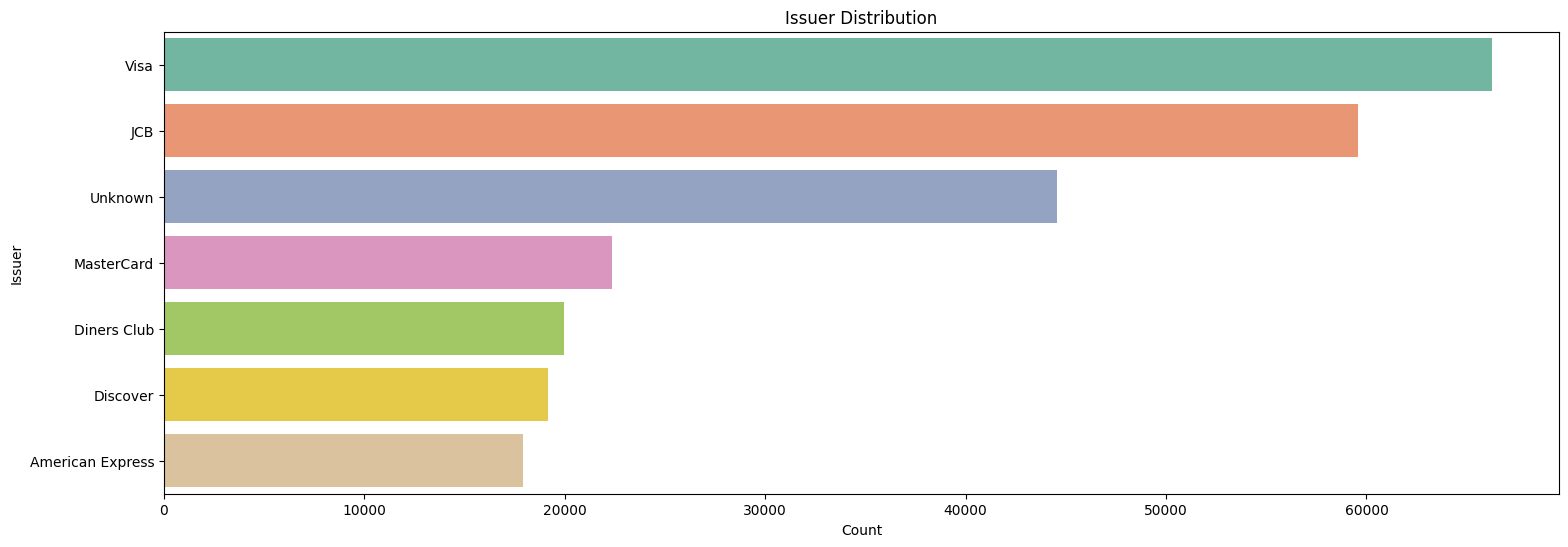

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Using a predefined color palette (e.g., 'Blues')
sns.countplot(data=df, y='issuer', order=df['issuer'].value_counts().index, palette='Set2')

plt.title('Issuer Distribution')
plt.xlabel('Count')
plt.ylabel('Issuer')
plt.show()

After classifing issuer fron cc_num we can now remove the cc_num column

In [44]:
df = df.drop(["cc_num"], axis=1)

Checking the ssn number

In [45]:
df['ssn'].value_counts()

ssn
535 53 1774    206
601 28 2159    205
709 70 9917    205
118 55 8699    203
157 51 7805    201
              ... 
001 40 3390      7
033 15 7333      7
137 17 4570      7
128 17 8509      5
751 47 8336      4
Name: count, Length: 3170, dtype: int64

The ssn itself does not indicate the person's age or birth date, remove the ssn column

In [46]:
df = df.drop(["ssn"], axis=1)

pickle

In [47]:
df.to_pickle('Data_Preparation.pkl')

In [67]:
df = pd.read_pickle('Data_Preparation.pkl')

#### Classify the job column to fewer categories

In [48]:
import re

def categorize_job(title):
#     title = title.lower()
    if re.search(r'product|software|developer|engineer|technologist|programmer', title):
        return 'Tech'
    elif re.search(r'office|customer|service|support|call|center|client|it', title):
        return 'IT'
    elif re.search(r'homeopath|herbalist|acupuncturist|osteopath|chiropodist|ophthalmologist|orthoptist|pharmacologist|optometrist|psychiatrist|podiatrist|medical|toxicologist|radiographer|therapeutic|haematologist|oncologist|immunologist|midwife|pathologist|dentist|biochemist|clinical|nurse|doctor|healthcare|health|psychotherapist|therapist|psychologist|physiologist|pharmacist|surgeon|optician', title):
        return 'Healthcare'
    elif re.search(r'pension|actuary|finance|analyst|economist|pensions|financial|accountant|tax|banker|investment|accounting|banking|analyst', title):
        return 'Finance'
    elif re.search(r'marketing|advertising|brand|editor|journalist', title):
        return 'Marketing'
    elif re.search(r'lobbyist|civil|administrator|government|inspector', title):
        return 'Government'
    elif re.search(r'theatre director|photographer|musician|gaffer|printmaker|dancer|camera|animator|best boy|radio|actor|publishing|broadcasting|film|videotheatre|producer|copywriter|architect|designer|designer|illustrator|arts|art|artist', title):
        return 'Art'
    elif re.search(r'music tutor|lecturer|education|professor|teacher|librarian', title):
        return 'Education'
    elif re.search(r'legal|executive|conveyancer|attorney|lawyer|warden|officer', title):
        return 'Low'
    elif re.search(r'clothing|textile', title):
        return 'Clothing/textile'
    elif re.search(r'astronomer|geneticist molecular|oceanographer|scientific laboratory|meteorologist|seismologist|microbiologist|chemist|seismic interpreter|hydrologist|ecologist|cytogeneticist|energy|herpetologist|metallurgist|geologist|scientist|geoscientist|scientist', title):
        return 'Scientist'
    elif re.search(r'surveyor', title):
        return 'Surveyor'
    elif re.search(r'horticultural consultant|dealer|broker|estate|agentbroker|trader|sales|retail|associate|merchandising', title):
        return 'Sales'
    elif re.search(r'statistician|data|information|researcher|media buyer|data|machine learning|ai|analyst|big data', title):
        return 'Data Scientist'
    elif re.search(r'barista|brewer|barrister|crew|event|organiser|hotel|fast|food|restaurant', title):
        return 'Hospitality industry'
    elif re.search(r'management|chief|manager|curator', title):
        return 'Management'
    else:
        return 'Other'  # Catch-all for unclassified jobs
        

df['job_category'] = df['job'].apply(categorize_job)
df['job_category'].value_counts()


job_category
IT                      52218
Tech                    36808
Healthcare              34968
Art                     19146
Other                   18284
Scientist               13795
Management              13049
Education               10437
Finance                 10437
Data Scientist           8290
Surveyor                 7466
Sales                    5806
Low                      5669
Government               5423
Hospitality industry     4193
Marketing                3793
Name: count, dtype: int64

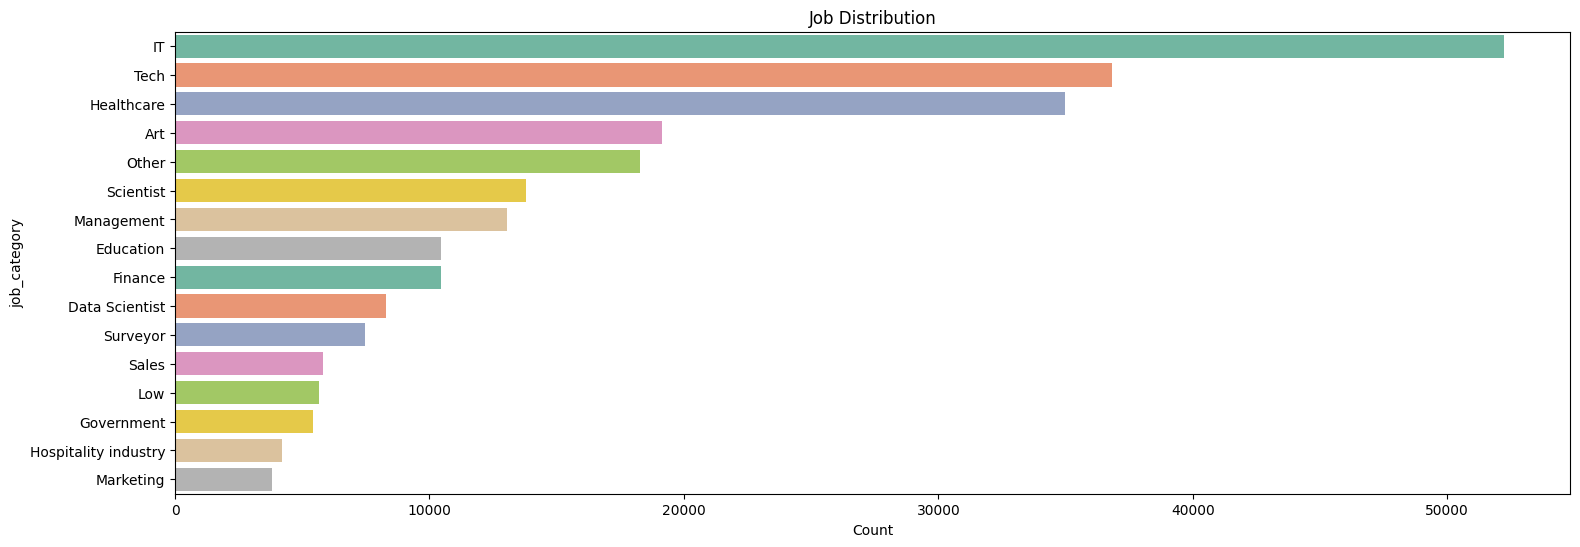

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('job_category')
plt.show()


Drop the 'job' column after clustering to categories

In [50]:
df = df.drop(["job"], axis=1)

In [51]:
df.to_pickle('Data_Preparation.pkl')

In [52]:
# df = pd.read_pickle('Data_Preparation.pkl')

In [53]:
df['state'].value_counts()

state
ny    86426
pa    59375
nj    38751
ma    27380
ct    16005
nh     6630
me     6555
vt     4380
ri     4280
Name: count, dtype: int64

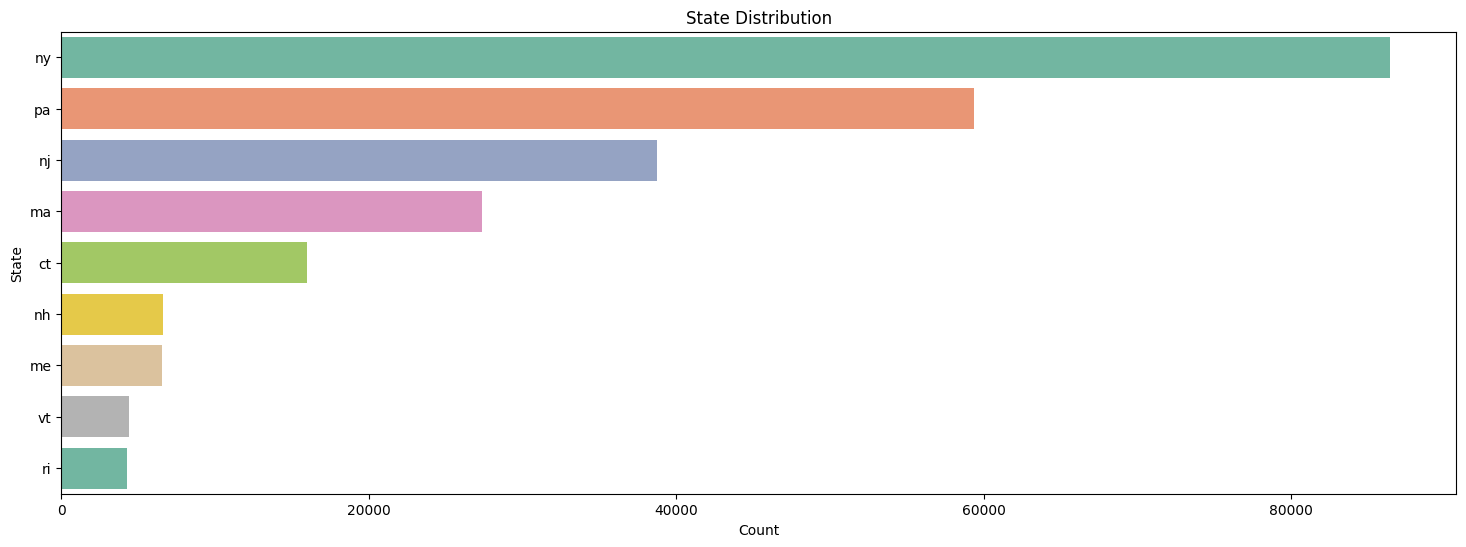

In [54]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='state', order=df['state'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('State Distribution')
plt.xlabel('Count')
plt.ylabel('State')

plt.show()

category/string data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   first         249782 non-null  category      
 1   last          249782 non-null  category      
 2   gender        249782 non-null  category      
 3   street        249782 non-null  category      
 4   city          249782 non-null  category      
 5   state         249782 non-null  category      
 6   zip           249782 non-null  int64         
 7   lat           249782 non-null  float64       
 8   long          249782 non-null  float64       
 9   city_pop      249782 non-null  int64         
 10  dob           249782 non-null  category      
 11  acct_num      249782 non-null  int64         
 12  profile       249782 non-null  category      
 13  trans_num     249782 non-null  category      
 14  trans_date    249782 non-null  datetime64[ns]
 15  trans_time    24978

In [56]:
cols_to_convert = ['first', 'last', 'street', 'city', 'merchant']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('string'))

In [57]:
cols_to_convert = ['job_category', 'issuer']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

#### Extracting information from the profile column 

In [59]:
df['profile'] = df['profile'].str.replace('json', '')
df['profile']

185        young adults female urban 
186        young adults female urban 
187        young adults female urban 
188        young adults female urban 
189        young adults female urban 
                      ...            
1364531       adults 50up male urban 
1364532       adults 50up male urban 
1364533       adults 50up male urban 
1364534       adults 50up male urban 
1364535       adults 50up male urban 
Name: profile, Length: 249782, dtype: object

In [60]:
# Function to extract "adults" or "young_adults"
def extract_category(filename):
    if 'young adults' in filename:
        return 'young adults'
    else:
        return 'adults'

# Apply the function to create a new column
df['age_category'] = df['profile'].apply(extract_category)

In [61]:
df['age_category'].value_counts()

age_category
adults          219359
young adults     30423
Name: count, dtype: int64

In [62]:
# Function to extract "urban" or "rural"
def extract_category(filename):
    if 'urban' in filename:
        return 'urban'
    else:
        return 'rural'

# Apply the function to create a new column
df['location'] = df['profile'].apply(extract_category)

In [63]:
 df['location'].value_counts()

location
urban    236868
rural     12914
Name: count, dtype: int64

In [83]:
# # Function to extract "50up" or "2550"
# def extract_category(filename):
#     if '50up' in filename:
#         return '50up'
#     else:
#         return '2550'

# # Apply the function to create a new column
# df['profile_category'] = df['profile'].apply(extract_category)

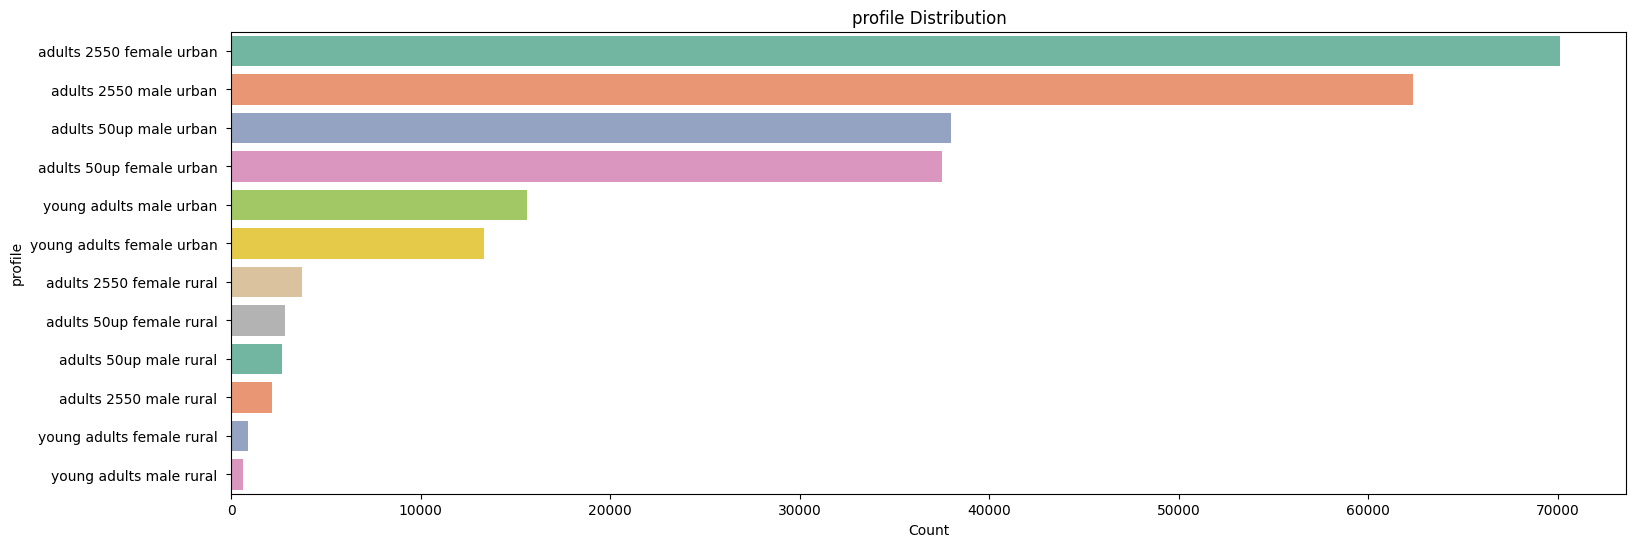

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='profile', order=df['profile'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('profile Distribution')
plt.xlabel('Count')
plt.ylabel('profile')
plt.show()

In [65]:
df[['profile', 'location','age_category']]

,profile,location,age_category
185,young adults female urban,urban,young adults
186,young adults female urban,urban,young adults
187,young adults female urban,urban,young adults
188,young adults female urban,urban,young adults
189,young adults female urban,urban,young adults
...,...,...,...
1364531,adults 50up male urban,urban,adults
1364532,adults 50up male urban,urban,adults
1364533,adults 50up male urban,urban,adults
1364534,adults 50up male urban,urban,adults


#### category column 

In [66]:
# Compute category frequencies
df['category'].value_counts()

category
shopping net      129310
shopping pos      119067
misc pos             538
grocery pos          315
misc net             182
gas transport        103
entertainment         52
kids pets             52
home                  37
food dining           36
personal care         29
health fitness        25
grocery net           22
travel                14
Name: count, dtype: int64

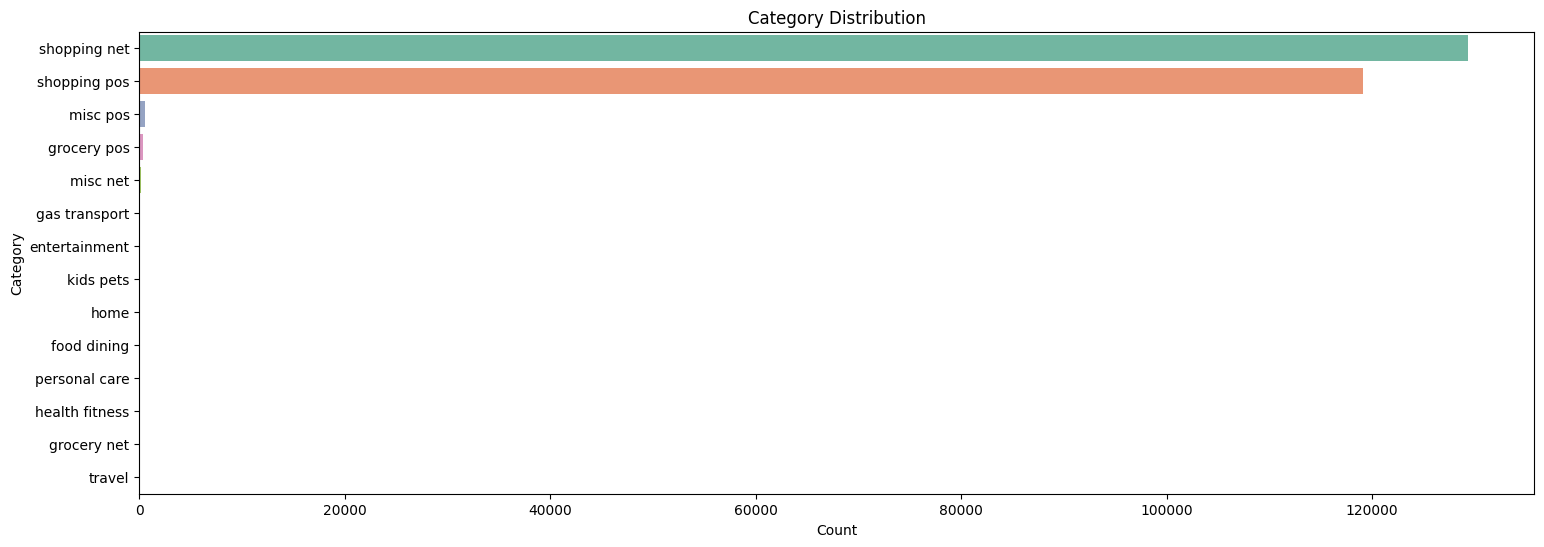

In [67]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [68]:
for col in df:
    print(col)
    print(df[col].value_counts())

first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: Int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
jennings      21
cooke         21
strong        20
rollins       17
hurley         7
Name: count, Length: 803, dtype: Int64
gender
gender
f    128414
m    121368
Name: count, dtype: int64
street
street
788 lawrence rest                  206
22354 stephanie club apt  971      205
893 gill ranch                     205
7896 erin lake suite 745           203
61750 carl springs                 201
                                  ... 
90629 jonathan islands apt  059      7
343 walker row                       7
501 richard dam suite 508            7
13499 mcgee lane suite 436           5
1853 smith roads apt  743            4
Name: count, Length: 3170, dty

In [70]:
df.to_pickle('Data_Preparation.pkl')

### Age Groups

Extracting the age from the dob (date of birth) column for more continuous columns

In [72]:
from datetime import datetime

# Convert 'dob' column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age by subtracting DOB from the current date and converting to years
df['age'] = df['dob'].apply(lambda x: (datetime.now() - x).days // 365)

Adding age range for future aggregation and more information extraction

In [73]:
# Categorize the ages into bins with labels
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 24, 34, 44, 69, float('inf')], labels=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], right=False)

In [74]:
# Aggregate the age groups
age_group_aggregation = df.groupby('age_range').size().reset_index(name='count')

age_group_aggregation

,age_range,count
0,<18,1424
1,18-24,16757
2,25-34,54040
3,35-44,56015
4,45-69,89972
5,>70,31574


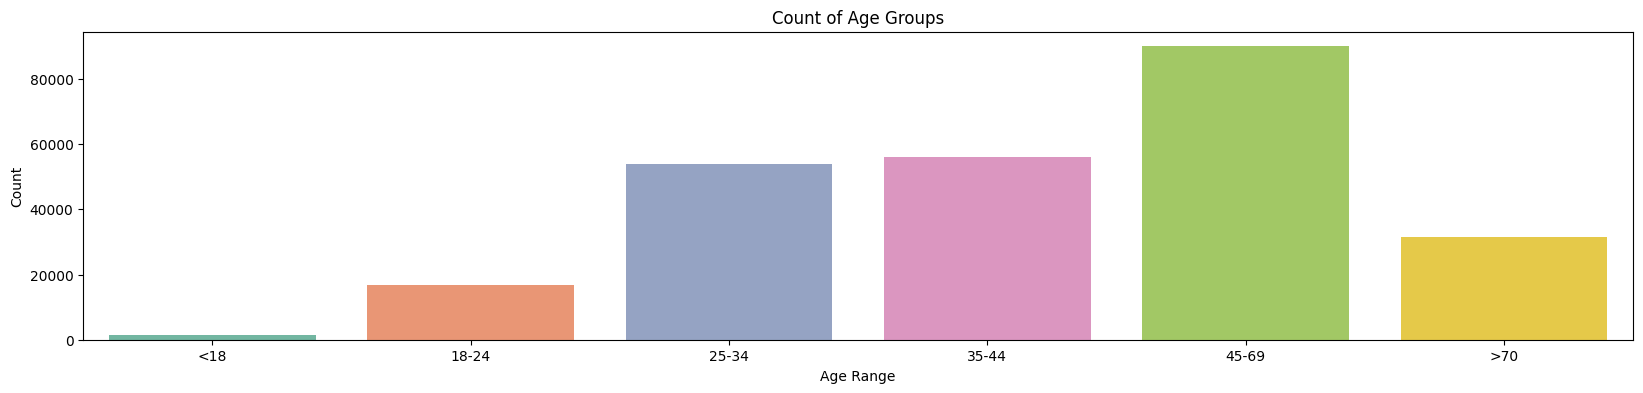

In [75]:
# Create a countplot with a color palette
plt.figure(figsize=(20, 4))
sns.countplot(x='age_range', data=df, order=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], palette='Set2')

# Add title and labels
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')

# Show the plot
plt.show()


Drop the 'dob' column after clustering to categories

In [76]:
df = df.drop(["dob"], axis=1)

In [77]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# # Display result
# print(age_group_aggregation)

In [78]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('age_range')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['age_range', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)


   age_range  fraud_percentage
1        <18          0.000000
3      18-24          0.763860
5      25-34          0.558845
7      35-44          0.344551
9      45-69          0.534611
11       >70          0.908976


#### Classify the trans_time column to fewer categories of the day

In [83]:
# Fix format by replacing spaces with colons
df['trans_time'] = df['trans_time'].str.replace(' ', ':')

In [84]:
df['trans_time'].value_counts()

trans_time
17:37:00    15
16:38:57    14
16:22:36    13
21:47:23    13
23:13:01    13
            ..
21:11:25     1
19:36:21     1
13:56:15     1
16:11:52     1
07:56:19     1
Name: count, Length: 79174, dtype: int64

In [85]:
# Convert 'trans_time' to datetime (only extract hour)
df['hour'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour

# Define time categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function
df['time_category'] = df['hour'].apply(categorize_time)


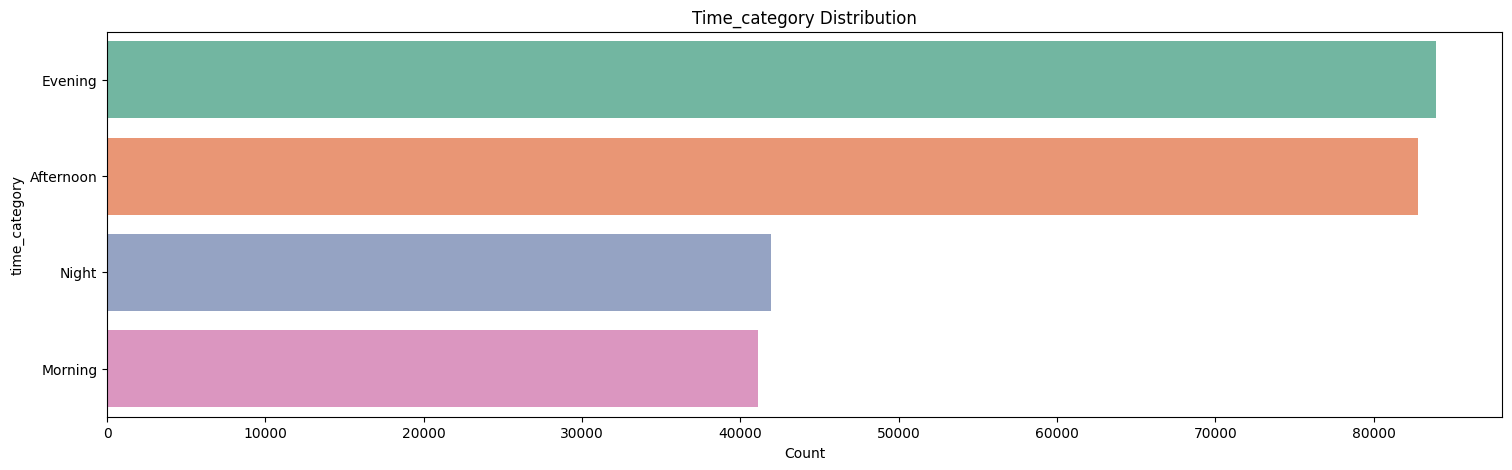

In [86]:
plt.figure(figsize=(18, 5))
sns.countplot(data=df, y='time_category', order=df['time_category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Time_category Distribution')
plt.xlabel('Count')
plt.ylabel('time_category')
plt.show()

Drop the 'trans_time' column after clustering to categories

In [87]:
df = df.drop(["trans_time"], axis=1)

In [88]:
df = df.drop(["hour"], axis=1)

In [89]:
df.to_pickle('Data_Preparation.pkl')

In [90]:
# df = pd.read_pickle('Data_Preparation.pkl')

In [91]:
for col in df:
    print(col)
    print(df[col].value_counts())

first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: Int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
jennings      21
cooke         21
strong        20
rollins       17
hurley         7
Name: count, Length: 803, dtype: Int64
gender
gender
f    128414
m    121368
Name: count, dtype: int64
street
street
788 lawrence rest                  206
22354 stephanie club apt  971      205
893 gill ranch                     205
7896 erin lake suite 745           203
61750 carl springs                 201
                                  ... 
90629 jonathan islands apt  059      7
343 walker row                       7
501 richard dam suite 508            7
13499 mcgee lane suite 436           5
1853 smith roads apt  743            4
Name: count, Length: 3170, dty

-----------------

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   first          249782 non-null  string        
 1   last           249782 non-null  string        
 2   gender         249782 non-null  category      
 3   street         249782 non-null  string        
 4   city           249782 non-null  string        
 5   state          249782 non-null  category      
 6   zip            249782 non-null  int64         
 7   lat            249782 non-null  float64       
 8   long           249782 non-null  float64       
 9   city_pop       249782 non-null  int64         
 10  acct_num       249782 non-null  int64         
 11  profile        249782 non-null  object        
 12  trans_num      249782 non-null  category      
 13  trans_date     249782 non-null  datetime64[ns]
 14  category       249782 non-null  category      
 15  am

In [94]:
cols_to_convert = ['profile','time_category', 'location', 'age_category']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

In [95]:
cols_to_convert = ['day']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

In [104]:
# 'string' Columns
string_to_df = df.select_dtypes(include=['string']).columns

Creating text df

In [105]:
df_text = df[string_to_df]
df_text

,first,last,street,city,merchant
185,kristina,gilbert,59404 steve mews suite 580,boonton,fraud stanton jakubowski and baumbach
186,kristina,gilbert,59404 steve mews suite 580,boonton,fraud predovic inc
187,kristina,gilbert,59404 steve mews suite 580,boonton,fraud heathcote llc
188,kristina,gilbert,59404 steve mews suite 580,boonton,fraud little gutmann and lynch
189,kristina,gilbert,59404 steve mews suite 580,boonton,fraud gleason macejkovic
...,...,...,...,...,...
1364531,isaiah,edwards,977 harris place apt 701,catskill,fraud pagac llc
1364532,isaiah,edwards,977 harris place apt 701,catskill,fraud kuhn llc
1364533,isaiah,edwards,977 harris place apt 701,catskill,fraud kihn inc
1364534,isaiah,edwards,977 harris place apt 701,catskill,fraud denesik and sons


In [106]:
df_text.to_pickle('df_text.pkl')

In [107]:
# df_text = pd.read_pickle('df_text.pkl')

Creating numerical df

In [108]:
# 'int' Columns
int_to_df = df.select_dtypes(include=['datetime64[ns]', 'int32', 'int64', 'float64']).columns

In [109]:
df_num = df[int_to_df]
df_num

,zip,lat,long,city_pop,acct_num,trans_date,amt,is_fraud,merch_lat,merch_long,age
185,7005,40.9115,-74.4140,15269,826475243361,2019-11-09,81.83,0,41.497516,-74.258973,22
186,7005,40.9115,-74.4140,15269,826475243361,2019-11-11,68.48,0,40.661566,-73.849180,22
187,7005,40.9115,-74.4140,15269,826475243361,2019-11-23,9.54,0,41.655939,-75.234739,22
188,7005,40.9115,-74.4140,15269,826475243361,2019-11-24,2.93,0,40.062355,-74.923742,22
189,7005,40.9115,-74.4140,15269,826475243361,2019-11-08,1.30,0,41.285106,-74.645948,22
...,...,...,...,...,...,...,...,...,...,...,...
1364531,12414,42.2276,-73.8985,10510,846920444376,2019-11-27,223.34,0,41.833756,-74.700726,57
1364532,12414,42.2276,-73.8985,10510,846920444376,2019-11-02,53.08,0,41.820045,-74.555250,57
1364533,12414,42.2276,-73.8985,10510,846920444376,2019-11-30,121.28,0,42.991588,-73.760047,57
1364534,12414,42.2276,-73.8985,10510,846920444376,2019-11-27,66.31,0,42.047309,-73.327625,57


In [110]:
df_num.to_pickle('df_num.pkl')

In [111]:
# df_num = pd.read_pickle('df_num.pkl')

Creating categorical df

In [112]:
# 'int' Columns
cat_to_df = df.select_dtypes(include=['category', 'bool']).columns

In [113]:
df_category = df[cat_to_df]
df_category

,gender,state,profile,trans_num,category,day,is_weekend,issuer,job_category,age_category,location,age_range,time_category
185,f,nj,young adults female urban,d551518dc69441dae803bb711b97c9ee,shopping net,9,True,Visa,Scientist,young adults,urban,18-24,Evening
186,f,nj,young adults female urban,ec83997c27461bf8a1a989021e4df9fe,shopping net,11,True,Visa,Scientist,young adults,urban,18-24,Evening
187,f,nj,young adults female urban,acdb36bf499af78ea13b2e8772da0d0c,shopping net,23,True,Visa,Scientist,young adults,urban,18-24,Afternoon
188,f,nj,young adults female urban,0e5ec24d278b397d21675e46042778c6,shopping net,24,True,Visa,Scientist,young adults,urban,18-24,Evening
189,f,nj,young adults female urban,c9d221acd26a21dfce4b7f79fe0dfcc2,shopping net,8,True,Visa,Scientist,young adults,urban,18-24,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364531,m,ny,adults 50up male urban,78fe71b220121da74887111badadeb85,shopping pos,27,True,Discover,IT,adults,urban,45-69,Morning
1364532,m,ny,adults 50up male urban,f1c3326c61354b89861454e029d14b34,shopping pos,2,False,Discover,IT,adults,urban,45-69,Night
1364533,m,ny,adults 50up male urban,10f05ec8ff0be2512b2621fa0f69c462,shopping pos,30,True,Discover,IT,adults,urban,45-69,Night
1364534,m,ny,adults 50up male urban,6a2375972b9acca4dd9051ee255bc4fd,shopping pos,27,True,Discover,IT,adults,urban,45-69,Morning


In [117]:
df_category.to_pickle('df_category.pkl')

In [115]:
# df_category = pd.read_pickle('df_category.pkl')

Saving Manipulated data

In [116]:
df.to_csv('final_data_prep_fraud_detection_copy')

In [119]:
df.to_pickle('Data_Preparation.pkl')

In [118]:
# df = pd.read_pickle('Data_Preparation.pkl')